In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
# error map
error_list = []
idx = [2,4,9,1,0,7,8,6,5,3]
#idx = [148,244,780,876,1984,2116,2336,2924,3788,3932]

for i, num in enumerate(idx):
    img1 = cv2.imread('../data/prediction/predicted/2801/grayscale/{}.png'.format(num), 0)
    img2 = np.load('../data/training/test_masks_n_2.npy')

    img2 = img2[num]

    #create black image of same size
    img3 = np.zeros((img1.shape[0], img1.shape[1], 3), np.uint8)

    for i in range(img1.shape[0]):
        for j in range(img1.shape[1]):
            if img1[i][j] == 0 and img2[i][j] != 0:
                img3[i][j] = (255,0,0)
            elif img1[i][j] != 0 and img2[i][j] == 0:
                img3[i][j] = (255,0,0)

    error_list.append(img3)

error_np = np.array(error_list)

In [14]:
# error map
error_list = []
idx = [2,4,9,1,0,7,8,6,5,3]
#idx = [148,244,780,876,1984,2116,2336,2924,3788,3932]
fp_si = 0
fp_oc = 0

fn_si = 0
fn_oc = 0

tp = 0
tn = 0

si_cnt = 0
oc_cnt = 0
mp_cnt = 0

for i, num in enumerate(idx):
    print(num)
    img1 = cv2.imread('../data/prediction/predicted/2801/raw/{}.png'.format(num), 0)
    img2 = np.load('../data/training/test_masks_n_2.npy')

    img2 = img2[num]


    for i in range(img1.shape[0]):
        for j in range(img1.shape[1]):
            if img2[i][j] == 2:
                oc_cnt += 1
            elif img2[i][j] == 1:
                si_cnt += 1
            if img2[i][j] == 0:
                mp_cnt += 1

            if img1[i][j] == 0 and img2[i][j] == 0:
                tp += 1
            elif img1[i][j] != 0 and img2[i][j] != 0:
                tn += 1
            # false positive
            elif img1[i][j] == 0 and img2[i][j] != 0:
                if img2[i][j] == 1:
                    fp_si += 1
                elif img2[i][j] == 2:
                    fp_oc += 1
            # false negative
            elif img1[i][j] != 0 and img2[i][j] == 0:
                if img1[i][j] == 1:
                    fn_si += 1
                elif img1[i][j] == 2:
                    fn_oc += 1
            else:
                print('there is smth wrong')

print('tp: ', tp)
print('tn: ', tn)
print('fp_si: ', fp_si)
print('fp_oc: ', fp_oc)
print('fn_si: ', fn_si)
print('fn_oc: ', fn_oc)
print('si_cnt: ', si_cnt)
print('oc_cnt: ', oc_cnt)
print('mp_cnt: ', mp_cnt)

2
4
9
1
0
7
8
6
5
3
tp:  187488
tn:  1921154
fp_si:  79279
fp_oc:  52826
fn_si:  26099
fn_oc:  37154
si_cnt:  1493027
oc_cnt:  560232
mp_cnt:  250741


In [37]:
total_cnt = si_cnt + oc_cnt + mp_cnt

print('si: ', si_cnt/total_cnt)
print('oc: ', oc_cnt/total_cnt)
print('mp: ', mp_cnt/total_cnt)

si:  0.6480151909722223
oc:  0.24315625
mp:  0.10882855902777777


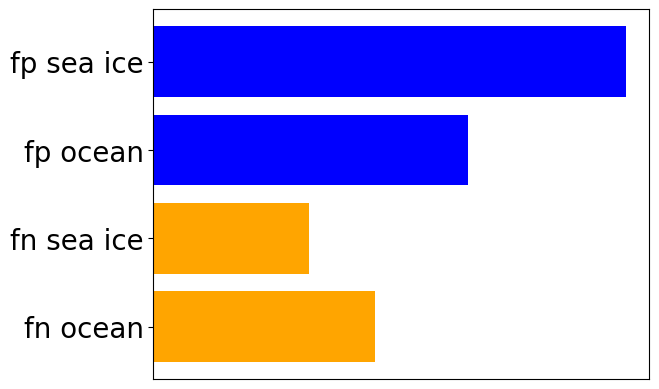

In [22]:
# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots()

# Example data
people = ('fp sea ice', 'fp ocean', 'fn sea ice', 'fn ocean')
y_pos = np.arange(len(people))
performance = [fp_si, fp_oc, fn_si, fn_oc]
color = ['blue', 'blue', 'orange', 'orange']
#error = np.random.rand(len(people))

ax.barh(y_pos, performance, align='center', color=color)
ax.set_yticks(y_pos, labels=people, fontsize=20)
ax.invert_yaxis()  # labels read top-to-bottom
#ax.set_xlabel('Number of pixels')
#ax.set_xticks('off')
ax.set_xticklabels([])
ax.set_xticks([])

plt.show()

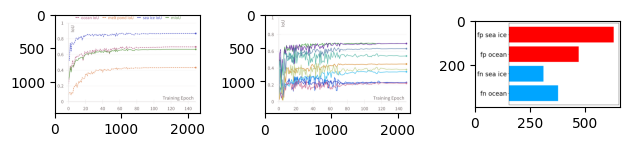

In [25]:
fig, ax = plt.subplots(1,3)

ax[0].imshow(cv2.imread('jac_all.PNG'))
ax[1].imshow(cv2.imread('per_img.PNG'))
ax[2].imshow(cv2.imread('fp_fn.png'))

plt.tight_layout()

In [11]:
preds = '../data/prediction/preprocessed/val/'
prepro = '../data/prediction/predicted/2801/grayscale'
gt = np.load('../data/training/test_masks_n_2.npy')

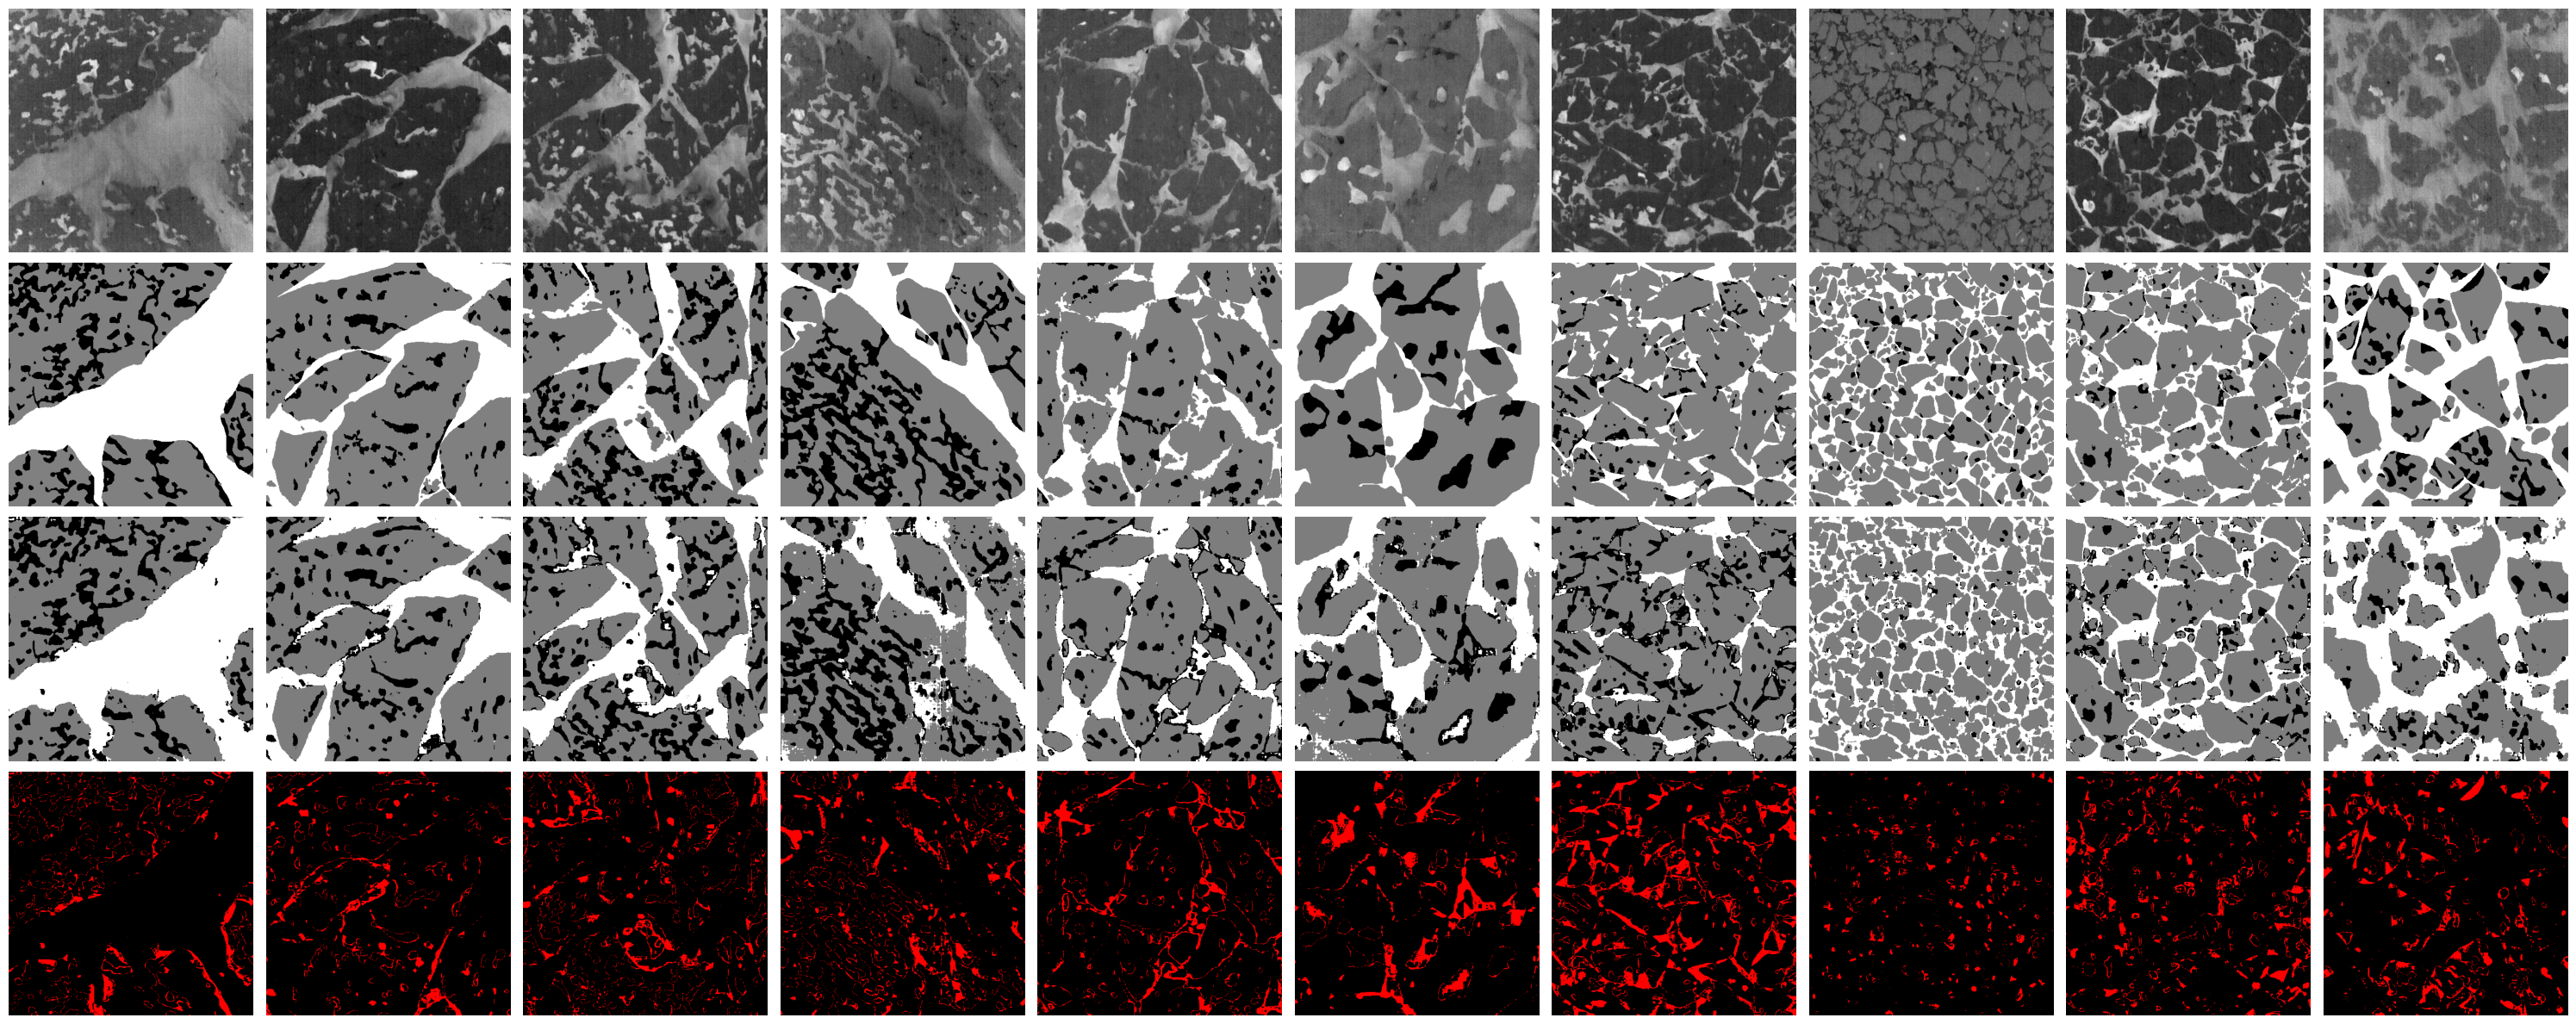

In [13]:
fig, ax = plt.subplots(4, 10, figsize=(30, 12))

# label
#ax[2,0].set_title('Predicted')
#ax[1,0].set_title('Ground Truth')
#ax[0,0].set_title('Input')

idx = [2,4,9,1,0,7,8,6,5,3]
#idx = [148,244,780,876,1984,2116,2336,2924,3788,3932]

for i, num in enumerate(idx):
    ax[0,i].imshow(cv2.imread(os.path.join(preds, str(num) + '.png')))
    # remove axis
    ax[0,i].set_axis_off()
    ax[2,i].imshow(cv2.imread(os.path.join(prepro, str(num) + '.png')))
    ax[2,i].set_axis_off()
    # colormap gray
    ax[1,i].imshow(gt[num], cmap='gray')
    ax[1,i].set_axis_off()
    ax[3,i].imshow(error_np[i])
    ax[3,i].set_axis_off()
    #ax[3,i].set_title('iou_value',y=-1.0)
    #ax[3,i].set_xlabel('iou_value')
    #plt.text(i + 0.5, 3.2, f'{num}', ha='center', va='center', fontsize=12, fontweight='bold')
    #, \
    #horizontalalignment='center', verticalalignment='center', \
    #transform=ax.transAxes)

# tight layout
plt.tight_layout()
plt.savefig('results_2701_2.png')

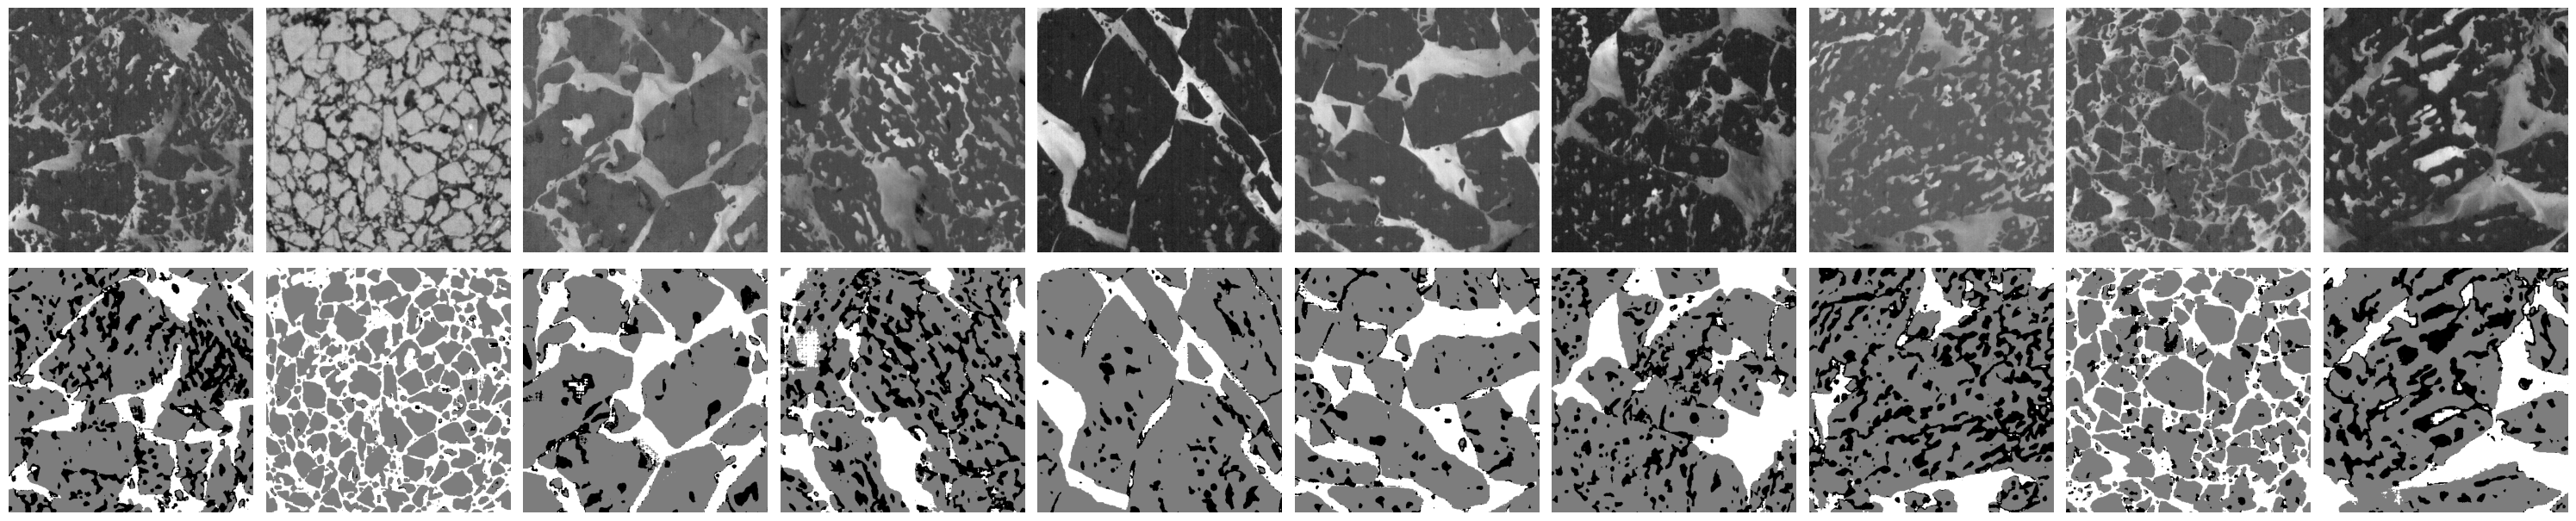

In [10]:
fig, ax = plt.subplots(2, 10, figsize=(30, 6.5))

# label
#ax[2,0].set_title('Predicted')
#ax[1,0].set_title('Ground Truth')
#ax[0,0].set_title('Input')

#idx = [2,4,9,1,0,7,8,6,5,3]
idx = [2756,244,36,2463,2116,2144,2336,1260,3788,2464]

for i, num in enumerate(idx):
    ax[0,i].imshow(cv2.imread(os.path.join(preds, str(num) + '.png')))
    # remove axis
    ax[0,i].set_axis_off()
    ax[1,i].imshow(cv2.imread(os.path.join(prepro, str(num) + '.png')))
    ax[1,i].set_axis_off()

# tight layout
plt.tight_layout()
plt.savefig('results_2701_test.png')